In [15]:
#%% import
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import pydot
# from pylab import *
from keras import models, layers, optimizers, metrics, utils, callbacks

#%% csv 불러오기
training = pd.read_csv('../data/titanic/train.csv')
testing = pd.read_csv('../data/titanic/test.csv')

#%% 데이터 요약
# msno.matrix(training)
# plt.show()
print(training.shape)
print(training.describe())
print(training.dtypes)
print(training.keys())
print(testing.keys())

#%% 데이터 분할
# x_train (학습에 쓸 문제), y_train (학습에 쓴 문제 정답)
# x_test (제출할 문제), y_test (추론해야 하는 것. 제출할 정답)
x_train = training.drop(columns=['Survived'])
y_train = training['Survived']
x_test = testing.copy()

#%% column 추가 (내 아이디어 아님)
x_train['People'] = x_train['SibSp'] + x_train['Parch'] + 1
x_train['IsAlone'] = x_train['People'].apply(lambda x: 1 if x == 1 else 0)
x_train['HasCabin'] = x_train['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

x_test['People'] = x_test['SibSp'] + x_test['Parch'] + 1
x_test['IsAlone'] = x_test['People'].apply(lambda x: 1 if x == 1 else 0)
x_test['HasCabin'] = x_test['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

#%% 결측치 제거 (mean? median?)
x_train['Age'] = x_train['Age'].fillna(x_train['Age'].mean())
x_test['Age'] = x_test['Age'].fillna(x_test['Age'].mean())

x_train['Embarked'] = x_train['Embarked'].fillna('S')

x_test['Fare'] = x_test['Fare'].fillna(testing['Fare'].mean())

#%% one-hot encoding
x_train['Sex'] = x_train['Sex'].map({'male': 0, 'female': 1})
x_train['Embarked'] = x_train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

x_test['Sex'] = x_test['Sex'].map({'male': 0, 'female': 1})
x_test['Embarked'] = x_test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

#%% 예측에 안 쓸 칼럼 제거
x_train = x_train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
x_test = x_test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])



(891, 12)
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
PassengerId      int64
Survived         int64
Pclass           int64
Na

Train on 712 samples, validate on 179 samples
Epoch 1/1000
712/712 [==============================] - 0s 545us/step - loss: 0.6987 - acc: 0.5478 - val_loss: 0.6906 - val_acc: 0.6648
Epoch 2/1000
712/712 [==============================] - 0s 34us/step - loss: 0.6960 - acc: 0.5772 - val_loss: 0.6897 - val_acc: 0.6425
Epoch 3/1000
712/712 [==============================] - 0s 34us/step - loss: 0.6826 - acc: 0.5941 - val_loss: 0.6883 - val_acc: 0.6425
Epoch 4/1000
712/712 [==============================] - 0s 39us/step - loss: 0.6785 - acc: 0.6096 - val_loss: 0.6876 - val_acc: 0.6425
Epoch 5/1000
712/712 [==============================] - 0s 44us/step - loss: 0.6706 - acc: 0.6152 - val_loss: 0.6467 - val_acc: 0.6425
Epoch 6/1000
712/712 [==============================] - 0s 42us/step - loss: 0.6590 - acc: 0.6138 - val_loss: 0.6141 - val_acc: 0.6425
Epoch 7/1000
712/712 [==============================] - 0s 43us/step - loss: 0.6602 - acc: 0.6208 - val_loss: 0.6008 - val_acc: 0.6425
Epoch 8/

Epoch 61/1000
712/712 [==============================] - 0s 39us/step - loss: 0.5412 - acc: 0.7416 - val_loss: 0.4461 - val_acc: 0.7989
Epoch 62/1000
712/712 [==============================] - 0s 40us/step - loss: 0.5403 - acc: 0.7570 - val_loss: 0.4547 - val_acc: 0.8045
Epoch 63/1000
712/712 [==============================] - 0s 37us/step - loss: 0.5312 - acc: 0.7528 - val_loss: 0.4414 - val_acc: 0.8101
Epoch 64/1000
712/712 [==============================] - 0s 35us/step - loss: 0.5213 - acc: 0.7486 - val_loss: 0.4488 - val_acc: 0.8268
Epoch 65/1000
712/712 [==============================] - 0s 32us/step - loss: 0.5414 - acc: 0.7430 - val_loss: 0.4502 - val_acc: 0.8324
Epoch 66/1000
712/712 [==============================] - 0s 33us/step - loss: 0.5317 - acc: 0.7598 - val_loss: 0.4469 - val_acc: 0.8268
Epoch 67/1000
712/712 [==============================] - 0s 35us/step - loss: 0.5205 - acc: 0.7669 - val_loss: 0.4482 - val_acc: 0.8212
Epoch 68/1000
712/712 [=========================

712/712 [==============================] - 0s 31us/step - loss: 0.4785 - acc: 0.7851 - val_loss: 0.4079 - val_acc: 0.8268
Epoch 122/1000
712/712 [==============================] - 0s 32us/step - loss: 0.4763 - acc: 0.7823 - val_loss: 0.4043 - val_acc: 0.8324
Epoch 123/1000
712/712 [==============================] - 0s 34us/step - loss: 0.4707 - acc: 0.7893 - val_loss: 0.3988 - val_acc: 0.8324
Epoch 124/1000
712/712 [==============================] - 0s 33us/step - loss: 0.4849 - acc: 0.7865 - val_loss: 0.4076 - val_acc: 0.8324
Epoch 125/1000
712/712 [==============================] - 0s 35us/step - loss: 0.4797 - acc: 0.7935 - val_loss: 0.3839 - val_acc: 0.8324
Epoch 126/1000
712/712 [==============================] - 0s 34us/step - loss: 0.4813 - acc: 0.7767 - val_loss: 0.3782 - val_acc: 0.8380
Epoch 127/1000
712/712 [==============================] - 0s 41us/step - loss: 0.4680 - acc: 0.7879 - val_loss: 0.4066 - val_acc: 0.8268
Epoch 128/1000
712/712 [==============================] 

Epoch 181/1000
712/712 [==============================] - 0s 41us/step - loss: 0.4473 - acc: 0.8062 - val_loss: 0.3950 - val_acc: 0.8380
Epoch 182/1000
712/712 [==============================] - 0s 40us/step - loss: 0.4578 - acc: 0.7963 - val_loss: 0.3997 - val_acc: 0.8268
Epoch 183/1000
712/712 [==============================] - 0s 45us/step - loss: 0.4553 - acc: 0.7963 - val_loss: 0.3806 - val_acc: 0.8380
Epoch 184/1000
712/712 [==============================] - 0s 44us/step - loss: 0.4666 - acc: 0.7949 - val_loss: 0.3750 - val_acc: 0.8380
Epoch 185/1000
712/712 [==============================] - 0s 41us/step - loss: 0.4525 - acc: 0.8006 - val_loss: 0.3955 - val_acc: 0.8380
Epoch 186/1000
712/712 [==============================] - 0s 40us/step - loss: 0.4607 - acc: 0.8006 - val_loss: 0.3859 - val_acc: 0.8212
Epoch 187/1000
712/712 [==============================] - 0s 34us/step - loss: 0.4559 - acc: 0.7935 - val_loss: 0.3814 - val_acc: 0.8380
Epoch 188/1000
712/712 [=================

Epoch 241/1000
712/712 [==============================] - 0s 38us/step - loss: 0.4532 - acc: 0.8076 - val_loss: 0.3638 - val_acc: 0.8547
Epoch 242/1000
712/712 [==============================] - 0s 42us/step - loss: 0.4456 - acc: 0.7921 - val_loss: 0.3647 - val_acc: 0.8603
Epoch 243/1000
712/712 [==============================] - 0s 40us/step - loss: 0.4502 - acc: 0.7963 - val_loss: 0.3616 - val_acc: 0.8603
Epoch 244/1000
712/712 [==============================] - 0s 41us/step - loss: 0.4318 - acc: 0.8006 - val_loss: 0.3940 - val_acc: 0.8436
Epoch 245/1000
712/712 [==============================] - 0s 42us/step - loss: 0.4319 - acc: 0.7935 - val_loss: 0.3769 - val_acc: 0.8492
Epoch 246/1000
712/712 [==============================] - 0s 43us/step - loss: 0.4414 - acc: 0.7978 - val_loss: 0.3572 - val_acc: 0.8212
Epoch 247/1000
712/712 [==============================] - 0s 41us/step - loss: 0.4338 - acc: 0.8006 - val_loss: 0.3631 - val_acc: 0.8547
Epoch 248/1000
712/712 [=================

Epoch 301/1000
712/712 [==============================] - 0s 39us/step - loss: 0.4355 - acc: 0.8160 - val_loss: 0.3880 - val_acc: 0.8547
Epoch 302/1000
712/712 [==============================] - 0s 50us/step - loss: 0.4124 - acc: 0.8174 - val_loss: 0.3819 - val_acc: 0.8492
Epoch 303/1000
712/712 [==============================] - 0s 36us/step - loss: 0.4325 - acc: 0.8104 - val_loss: 0.3628 - val_acc: 0.8771
Epoch 304/1000
712/712 [==============================] - 0s 35us/step - loss: 0.4452 - acc: 0.7907 - val_loss: 0.3542 - val_acc: 0.8603
Epoch 305/1000
712/712 [==============================] - 0s 46us/step - loss: 0.4359 - acc: 0.7893 - val_loss: 0.3802 - val_acc: 0.8547
Epoch 306/1000
712/712 [==============================] - 0s 42us/step - loss: 0.4207 - acc: 0.8104 - val_loss: 0.3790 - val_acc: 0.8436
Epoch 307/1000
712/712 [==============================] - 0s 46us/step - loss: 0.4429 - acc: 0.8006 - val_loss: 0.3883 - val_acc: 0.8547
Epoch 308/1000
712/712 [=================

Epoch 361/1000
712/712 [==============================] - 0s 39us/step - loss: 0.4150 - acc: 0.8160 - val_loss: 0.3549 - val_acc: 0.8827
Epoch 362/1000
712/712 [==============================] - 0s 41us/step - loss: 0.4153 - acc: 0.8090 - val_loss: 0.3874 - val_acc: 0.8436
Epoch 363/1000
712/712 [==============================] - 0s 37us/step - loss: 0.4090 - acc: 0.8062 - val_loss: 0.3856 - val_acc: 0.8492
Epoch 364/1000
712/712 [==============================] - 0s 40us/step - loss: 0.4140 - acc: 0.8160 - val_loss: 0.3725 - val_acc: 0.8492
Epoch 365/1000
712/712 [==============================] - 0s 43us/step - loss: 0.4268 - acc: 0.8118 - val_loss: 0.3587 - val_acc: 0.8492
Epoch 366/1000
712/712 [==============================] - 0s 40us/step - loss: 0.4158 - acc: 0.8090 - val_loss: 0.3726 - val_acc: 0.8547
Epoch 367/1000
712/712 [==============================] - 0s 39us/step - loss: 0.4149 - acc: 0.7992 - val_loss: 0.3958 - val_acc: 0.8212
Epoch 368/1000
712/712 [=================

Epoch 421/1000
712/712 [==============================] - 0s 37us/step - loss: 0.4125 - acc: 0.8160 - val_loss: 0.3652 - val_acc: 0.8547
Epoch 422/1000
712/712 [==============================] - 0s 33us/step - loss: 0.4081 - acc: 0.8090 - val_loss: 0.3727 - val_acc: 0.8380
Epoch 423/1000
712/712 [==============================] - 0s 33us/step - loss: 0.4132 - acc: 0.7921 - val_loss: 0.4112 - val_acc: 0.8156
Epoch 424/1000
712/712 [==============================] - 0s 35us/step - loss: 0.4089 - acc: 0.8244 - val_loss: 0.3673 - val_acc: 0.8659
Epoch 425/1000
712/712 [==============================] - 0s 36us/step - loss: 0.4123 - acc: 0.8174 - val_loss: 0.3458 - val_acc: 0.8547
Epoch 426/1000
712/712 [==============================] - 0s 34us/step - loss: 0.4208 - acc: 0.8357 - val_loss: 0.3727 - val_acc: 0.8268
Epoch 427/1000
712/712 [==============================] - 0s 35us/step - loss: 0.4193 - acc: 0.8272 - val_loss: 0.3620 - val_acc: 0.8603
Epoch 428/1000
712/712 [=================

Epoch 481/1000
712/712 [==============================] - 0s 34us/step - loss: 0.4106 - acc: 0.8132 - val_loss: 0.3507 - val_acc: 0.8603
Epoch 482/1000
712/712 [==============================] - 0s 34us/step - loss: 0.4064 - acc: 0.8020 - val_loss: 0.3529 - val_acc: 0.8715
Epoch 483/1000
712/712 [==============================] - 0s 31us/step - loss: 0.4045 - acc: 0.8076 - val_loss: 0.3781 - val_acc: 0.8492
Epoch 484/1000
712/712 [==============================] - 0s 34us/step - loss: 0.4026 - acc: 0.8160 - val_loss: 0.3599 - val_acc: 0.8771
Epoch 485/1000
712/712 [==============================] - 0s 33us/step - loss: 0.4134 - acc: 0.8034 - val_loss: 0.3740 - val_acc: 0.8436
Epoch 486/1000
712/712 [==============================] - 0s 36us/step - loss: 0.4115 - acc: 0.8244 - val_loss: 0.3554 - val_acc: 0.8715
Epoch 487/1000
712/712 [==============================] - 0s 35us/step - loss: 0.4200 - acc: 0.8160 - val_loss: 0.3608 - val_acc: 0.8436
Epoch 488/1000
712/712 [=================

712/712 [==============================] - 0s 36us/step - loss: 0.3923 - acc: 0.8244 - val_loss: 0.3457 - val_acc: 0.8492
Epoch 541/1000
712/712 [==============================] - 0s 32us/step - loss: 0.4285 - acc: 0.8104 - val_loss: 0.3858 - val_acc: 0.8436
Epoch 542/1000
712/712 [==============================] - 0s 42us/step - loss: 0.4027 - acc: 0.8006 - val_loss: 0.3587 - val_acc: 0.8492
Epoch 543/1000
712/712 [==============================] - 0s 38us/step - loss: 0.3875 - acc: 0.8329 - val_loss: 0.3456 - val_acc: 0.8771
Epoch 544/1000
712/712 [==============================] - 0s 33us/step - loss: 0.4144 - acc: 0.8174 - val_loss: 0.3378 - val_acc: 0.8659
Epoch 545/1000
712/712 [==============================] - 0s 36us/step - loss: 0.4010 - acc: 0.8315 - val_loss: 0.3448 - val_acc: 0.8771
Epoch 546/1000
712/712 [==============================] - 0s 35us/step - loss: 0.3932 - acc: 0.8258 - val_loss: 0.3625 - val_acc: 0.8547
Epoch 547/1000
712/712 [==============================] 

Epoch 600/1000
712/712 [==============================] - 0s 32us/step - loss: 0.3968 - acc: 0.8230 - val_loss: 0.3676 - val_acc: 0.8212
Epoch 601/1000
712/712 [==============================] - 0s 34us/step - loss: 0.3811 - acc: 0.8287 - val_loss: 0.3601 - val_acc: 0.8436
Epoch 602/1000
712/712 [==============================] - 0s 33us/step - loss: 0.3886 - acc: 0.8301 - val_loss: 0.3834 - val_acc: 0.8324
Epoch 603/1000
712/712 [==============================] - 0s 35us/step - loss: 0.4010 - acc: 0.8090 - val_loss: 0.3458 - val_acc: 0.8659
Epoch 604/1000
712/712 [==============================] - 0s 34us/step - loss: 0.4043 - acc: 0.8174 - val_loss: 0.3377 - val_acc: 0.8659
Epoch 605/1000
712/712 [==============================] - 0s 32us/step - loss: 0.3997 - acc: 0.8258 - val_loss: 0.3307 - val_acc: 0.8659
Epoch 606/1000
712/712 [==============================] - 0s 36us/step - loss: 0.3977 - acc: 0.8216 - val_loss: 0.3643 - val_acc: 0.8603
Epoch 607/1000
712/712 [=================

Epoch 660/1000
712/712 [==============================] - 0s 36us/step - loss: 0.3863 - acc: 0.8272 - val_loss: 0.3549 - val_acc: 0.8324
Epoch 661/1000
712/712 [==============================] - 0s 38us/step - loss: 0.3945 - acc: 0.8343 - val_loss: 0.3721 - val_acc: 0.8212
Epoch 662/1000
712/712 [==============================] - 0s 36us/step - loss: 0.3979 - acc: 0.8272 - val_loss: 0.3864 - val_acc: 0.8547
Epoch 663/1000
712/712 [==============================] - 0s 35us/step - loss: 0.3902 - acc: 0.8371 - val_loss: 0.3472 - val_acc: 0.8324
Epoch 664/1000
712/712 [==============================] - 0s 32us/step - loss: 0.3848 - acc: 0.8146 - val_loss: 0.3587 - val_acc: 0.8380
Epoch 665/1000
712/712 [==============================] - 0s 41us/step - loss: 0.3875 - acc: 0.8188 - val_loss: 0.3549 - val_acc: 0.8436
Epoch 666/1000
712/712 [==============================] - 0s 38us/step - loss: 0.3852 - acc: 0.8427 - val_loss: 0.3827 - val_acc: 0.8212
Epoch 667/1000
712/712 [=================

Epoch 720/1000
712/712 [==============================] - 0s 33us/step - loss: 0.3928 - acc: 0.8104 - val_loss: 0.3637 - val_acc: 0.8380
Epoch 721/1000
712/712 [==============================] - 0s 34us/step - loss: 0.3760 - acc: 0.8315 - val_loss: 0.3485 - val_acc: 0.8603
Epoch 722/1000
712/712 [==============================] - 0s 34us/step - loss: 0.3813 - acc: 0.8385 - val_loss: 0.4163 - val_acc: 0.8268
Epoch 723/1000
712/712 [==============================] - 0s 33us/step - loss: 0.3854 - acc: 0.8160 - val_loss: 0.3606 - val_acc: 0.8324
Epoch 724/1000
712/712 [==============================] - 0s 33us/step - loss: 0.3757 - acc: 0.8357 - val_loss: 0.3518 - val_acc: 0.8380
Epoch 725/1000
712/712 [==============================] - 0s 35us/step - loss: 0.3916 - acc: 0.8287 - val_loss: 0.3794 - val_acc: 0.8436
Epoch 726/1000
712/712 [==============================] - 0s 34us/step - loss: 0.3859 - acc: 0.8413 - val_loss: 0.3862 - val_acc: 0.8380
Epoch 727/1000
712/712 [=================

Epoch 780/1000
712/712 [==============================] - 0s 31us/step - loss: 0.3844 - acc: 0.8272 - val_loss: 0.3333 - val_acc: 0.8715
Epoch 781/1000
712/712 [==============================] - 0s 36us/step - loss: 0.3825 - acc: 0.8427 - val_loss: 0.3378 - val_acc: 0.8492
Epoch 782/1000
712/712 [==============================] - 0s 34us/step - loss: 0.3893 - acc: 0.8272 - val_loss: 0.3376 - val_acc: 0.8492
Epoch 783/1000
712/712 [==============================] - 0s 32us/step - loss: 0.3730 - acc: 0.8315 - val_loss: 0.3800 - val_acc: 0.8268
Epoch 784/1000
712/712 [==============================] - 0s 36us/step - loss: 0.3803 - acc: 0.8357 - val_loss: 0.4557 - val_acc: 0.8268
Epoch 785/1000
712/712 [==============================] - 0s 33us/step - loss: 0.4083 - acc: 0.8329 - val_loss: 0.3647 - val_acc: 0.8268
Epoch 786/1000
712/712 [==============================] - 0s 37us/step - loss: 0.3781 - acc: 0.8511 - val_loss: 0.3389 - val_acc: 0.8547
Epoch 787/1000
712/712 [=================

Epoch 840/1000
712/712 [==============================] - 0s 35us/step - loss: 0.3757 - acc: 0.8287 - val_loss: 0.3728 - val_acc: 0.8380
Epoch 841/1000
712/712 [==============================] - 0s 33us/step - loss: 0.3879 - acc: 0.8258 - val_loss: 0.3829 - val_acc: 0.8324
Epoch 842/1000
712/712 [==============================] - 0s 34us/step - loss: 0.3822 - acc: 0.8329 - val_loss: 0.3674 - val_acc: 0.8547
Epoch 843/1000
712/712 [==============================] - 0s 31us/step - loss: 0.3818 - acc: 0.8301 - val_loss: 0.3738 - val_acc: 0.8547
Epoch 844/1000
712/712 [==============================] - 0s 35us/step - loss: 0.3841 - acc: 0.8287 - val_loss: 0.3547 - val_acc: 0.8603
Epoch 845/1000
712/712 [==============================] - 0s 31us/step - loss: 0.3787 - acc: 0.8343 - val_loss: 0.3462 - val_acc: 0.8715
Epoch 846/1000
712/712 [==============================] - 0s 35us/step - loss: 0.3679 - acc: 0.8455 - val_loss: 0.3813 - val_acc: 0.8603
Epoch 847/1000
712/712 [=================

Epoch 900/1000
712/712 [==============================] - 0s 34us/step - loss: 0.3965 - acc: 0.8244 - val_loss: 0.3711 - val_acc: 0.8436
Epoch 901/1000
712/712 [==============================] - 0s 38us/step - loss: 0.3711 - acc: 0.8455 - val_loss: 0.4094 - val_acc: 0.8156
Epoch 902/1000
712/712 [==============================] - 0s 32us/step - loss: 0.3793 - acc: 0.8399 - val_loss: 0.3426 - val_acc: 0.8492
Epoch 903/1000
712/712 [==============================] - 0s 30us/step - loss: 0.3773 - acc: 0.8399 - val_loss: 0.3690 - val_acc: 0.8492
Epoch 904/1000
712/712 [==============================] - 0s 34us/step - loss: 0.3972 - acc: 0.8202 - val_loss: 0.3862 - val_acc: 0.8324
Epoch 905/1000
712/712 [==============================] - 0s 33us/step - loss: 0.3609 - acc: 0.8511 - val_loss: 0.3816 - val_acc: 0.8324
Epoch 906/1000
712/712 [==============================] - 0s 35us/step - loss: 0.3735 - acc: 0.8301 - val_loss: 0.3446 - val_acc: 0.8492
Epoch 907/1000
712/712 [=================

Epoch 960/1000
712/712 [==============================] - 0s 33us/step - loss: 0.3666 - acc: 0.8258 - val_loss: 0.3570 - val_acc: 0.8659
Epoch 961/1000
712/712 [==============================] - 0s 37us/step - loss: 0.3709 - acc: 0.8287 - val_loss: 0.3623 - val_acc: 0.8324
Epoch 962/1000
712/712 [==============================] - 0s 35us/step - loss: 0.3852 - acc: 0.8188 - val_loss: 0.3599 - val_acc: 0.8436
Epoch 963/1000
712/712 [==============================] - 0s 33us/step - loss: 0.3779 - acc: 0.8385 - val_loss: 0.4532 - val_acc: 0.8045
Epoch 964/1000
712/712 [==============================] - 0s 35us/step - loss: 0.3922 - acc: 0.8174 - val_loss: 0.3714 - val_acc: 0.8492
Epoch 965/1000
712/712 [==============================] - 0s 33us/step - loss: 0.3618 - acc: 0.8455 - val_loss: 0.3570 - val_acc: 0.8492
Epoch 966/1000
712/712 [==============================] - 0s 33us/step - loss: 0.3849 - acc: 0.8329 - val_loss: 0.3731 - val_acc: 0.8045
Epoch 967/1000
712/712 [=================

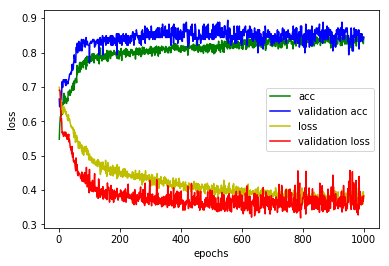

In [21]:

# #%% create model
# model = models.Sequential()
# model.add(layers.Dense(units=64, activation='relu', input_dim=10))
# model.add(layers.Dense(units=32, activation='relu'))
# model.add(layers.Dropout(rate=0.5))
# model.add(layers.Dense(units=16, activation='relu'))
# model.add(layers.Dense(units=8, activation='relu'))
# model.add(layers.Dense(units=4, activation='relu'))
# model.add(layers.Dense(units=2, activation='relu'))
# model.add(layers.Dense(units=1, activation='sigmoid'))

# model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# # utils.plot_model(model, to_file='model.png', show_shapes=True)

# #%% fitting
# # early_stopping = callbacks.EarlyStopping(monitor='val_acc')
# fit_history = model.fit(x_train, y_train, epochs=1000, validation_split=0.2, shuffle=True, batch_size=64)




In [31]:

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_dim=len(x_train.columns)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5)) # 과적합방지 Dropout. 
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# opt = optimizers.Adam(lr=0.001, beta_1=0.5, beta_2=0.99, epsilon=None, decay=0.0, amsgrad=False)
opt = optimizers.Adam(lr=0.0001, decay=0.01, amsgrad=True)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

print(model.summary)

fit_history = model.fit(x_train, y_train, epochs=500, batch_size=50,validation_split=0.1)

<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x1a259fd4e0>>
Train on 801 samples, validate on 90 samples
Epoch 1/500
801/801 [==============================] - 1s 673us/step - loss: 0.9937 - acc: 0.3958 - val_loss: 0.6945 - val_acc: 0.3778
Epoch 2/500
801/801 [==============================] - 0s 82us/step - loss: 0.8259 - acc: 0.4132 - val_loss: 0.6785 - val_acc: 0.5111
Epoch 3/500
801/801 [==============================] - 0s 74us/step - loss: 0.7439 - acc: 0.4544 - val_loss: 0.6835 - val_acc: 0.6444
Epoch 4/500
801/801 [==============================] - 0s 56us/step - loss: 0.7067 - acc: 0.5293 - val_loss: 0.6837 - val_acc: 0.6667
Epoch 5/500
801/801 [==============================] - 0s 52us/step - loss: 0.6913 - acc: 0.5581 - val_loss: 0.6845 - val_acc: 0.6667
Epoch 6/500
801/801 [==============================] - 0s 55us/step - loss: 0.6888 - acc: 0.5618 - val_loss: 0.6842 - val_acc: 0.6778
Epoch 7/500
801/801 [==============================] - 0

Epoch 61/500
801/801 [==============================] - 0s 58us/step - loss: 0.6754 - acc: 0.6380 - val_loss: 0.6750 - val_acc: 0.6444
Epoch 62/500
801/801 [==============================] - 0s 59us/step - loss: 0.6777 - acc: 0.6367 - val_loss: 0.6751 - val_acc: 0.6444
Epoch 63/500
801/801 [==============================] - 0s 66us/step - loss: 0.6767 - acc: 0.6142 - val_loss: 0.6751 - val_acc: 0.6444
Epoch 64/500
801/801 [==============================] - 0s 64us/step - loss: 0.6780 - acc: 0.6392 - val_loss: 0.6750 - val_acc: 0.6444
Epoch 65/500
801/801 [==============================] - 0s 65us/step - loss: 0.6767 - acc: 0.6404 - val_loss: 0.6749 - val_acc: 0.6444
Epoch 66/500
801/801 [==============================] - 0s 71us/step - loss: 0.6780 - acc: 0.6155 - val_loss: 0.6748 - val_acc: 0.6444
Epoch 67/500
801/801 [==============================] - 0s 64us/step - loss: 0.6693 - acc: 0.6429 - val_loss: 0.6746 - val_acc: 0.6444
Epoch 68/500
801/801 [==============================] -

801/801 [==============================] - 0s 52us/step - loss: 0.6685 - acc: 0.6429 - val_loss: 0.6708 - val_acc: 0.6889
Epoch 122/500
801/801 [==============================] - 0s 53us/step - loss: 0.6718 - acc: 0.6230 - val_loss: 0.6707 - val_acc: 0.6889
Epoch 123/500
801/801 [==============================] - 0s 60us/step - loss: 0.6748 - acc: 0.6417 - val_loss: 0.6706 - val_acc: 0.6889
Epoch 124/500
801/801 [==============================] - 0s 54us/step - loss: 0.6704 - acc: 0.6317 - val_loss: 0.6705 - val_acc: 0.6889
Epoch 125/500
801/801 [==============================] - 0s 51us/step - loss: 0.6733 - acc: 0.6367 - val_loss: 0.6701 - val_acc: 0.6778
Epoch 126/500
801/801 [==============================] - 0s 49us/step - loss: 0.6738 - acc: 0.6342 - val_loss: 0.6701 - val_acc: 0.6778
Epoch 127/500
801/801 [==============================] - 0s 50us/step - loss: 0.6753 - acc: 0.6205 - val_loss: 0.6700 - val_acc: 0.6778
Epoch 128/500
801/801 [==============================] - 0s 55

801/801 [==============================] - 0s 47us/step - loss: 0.6695 - acc: 0.6542 - val_loss: 0.6670 - val_acc: 0.6889
Epoch 182/500
801/801 [==============================] - 0s 49us/step - loss: 0.6632 - acc: 0.6442 - val_loss: 0.6669 - val_acc: 0.6889
Epoch 183/500
801/801 [==============================] - 0s 48us/step - loss: 0.6632 - acc: 0.6529 - val_loss: 0.6668 - val_acc: 0.6889
Epoch 184/500
801/801 [==============================] - 0s 50us/step - loss: 0.6726 - acc: 0.6404 - val_loss: 0.6667 - val_acc: 0.6889
Epoch 185/500
801/801 [==============================] - 0s 54us/step - loss: 0.6707 - acc: 0.6454 - val_loss: 0.6667 - val_acc: 0.6889
Epoch 186/500
801/801 [==============================] - 0s 48us/step - loss: 0.6696 - acc: 0.6292 - val_loss: 0.6666 - val_acc: 0.6889
Epoch 187/500
801/801 [==============================] - 0s 47us/step - loss: 0.6650 - acc: 0.6579 - val_loss: 0.6666 - val_acc: 0.6889
Epoch 188/500
801/801 [==============================] - 0s 51

801/801 [==============================] - 0s 52us/step - loss: 0.6662 - acc: 0.6567 - val_loss: 0.6642 - val_acc: 0.6889
Epoch 242/500
801/801 [==============================] - 0s 51us/step - loss: 0.6692 - acc: 0.6467 - val_loss: 0.6642 - val_acc: 0.6889
Epoch 243/500
801/801 [==============================] - 0s 50us/step - loss: 0.6772 - acc: 0.6529 - val_loss: 0.6642 - val_acc: 0.6889
Epoch 244/500
801/801 [==============================] - 0s 49us/step - loss: 0.6649 - acc: 0.6754 - val_loss: 0.6641 - val_acc: 0.6889
Epoch 245/500
801/801 [==============================] - 0s 53us/step - loss: 0.6668 - acc: 0.6380 - val_loss: 0.6641 - val_acc: 0.6889
Epoch 246/500
801/801 [==============================] - 0s 51us/step - loss: 0.6632 - acc: 0.6454 - val_loss: 0.6641 - val_acc: 0.6889
Epoch 247/500
801/801 [==============================] - 0s 45us/step - loss: 0.6656 - acc: 0.6617 - val_loss: 0.6640 - val_acc: 0.6889
Epoch 248/500
801/801 [==============================] - 0s 46

801/801 [==============================] - 0s 51us/step - loss: 0.6657 - acc: 0.6417 - val_loss: 0.6620 - val_acc: 0.6889
Epoch 302/500
801/801 [==============================] - 0s 40us/step - loss: 0.6616 - acc: 0.6579 - val_loss: 0.6620 - val_acc: 0.6889
Epoch 303/500
801/801 [==============================] - 0s 52us/step - loss: 0.6622 - acc: 0.6330 - val_loss: 0.6619 - val_acc: 0.6889
Epoch 304/500
801/801 [==============================] - 0s 50us/step - loss: 0.6634 - acc: 0.6529 - val_loss: 0.6619 - val_acc: 0.6889
Epoch 305/500
801/801 [==============================] - 0s 51us/step - loss: 0.6702 - acc: 0.6404 - val_loss: 0.6618 - val_acc: 0.6889
Epoch 306/500
801/801 [==============================] - 0s 47us/step - loss: 0.6698 - acc: 0.6504 - val_loss: 0.6618 - val_acc: 0.6889
Epoch 307/500
801/801 [==============================] - 0s 50us/step - loss: 0.6649 - acc: 0.6342 - val_loss: 0.6618 - val_acc: 0.6889
Epoch 308/500
801/801 [==============================] - 0s 52

801/801 [==============================] - 0s 49us/step - loss: 0.6676 - acc: 0.6380 - val_loss: 0.6600 - val_acc: 0.6889
Epoch 362/500
801/801 [==============================] - 0s 50us/step - loss: 0.6627 - acc: 0.6604 - val_loss: 0.6600 - val_acc: 0.6889
Epoch 363/500
801/801 [==============================] - 0s 50us/step - loss: 0.6673 - acc: 0.6529 - val_loss: 0.6600 - val_acc: 0.6889
Epoch 364/500
801/801 [==============================] - 0s 49us/step - loss: 0.6619 - acc: 0.6392 - val_loss: 0.6599 - val_acc: 0.6889
Epoch 365/500
801/801 [==============================] - 0s 54us/step - loss: 0.6612 - acc: 0.6679 - val_loss: 0.6599 - val_acc: 0.6889
Epoch 366/500
801/801 [==============================] - 0s 56us/step - loss: 0.6594 - acc: 0.6642 - val_loss: 0.6599 - val_acc: 0.6889
Epoch 367/500
801/801 [==============================] - 0s 65us/step - loss: 0.6590 - acc: 0.6829 - val_loss: 0.6599 - val_acc: 0.6889
Epoch 368/500
801/801 [==============================] - 0s 57

801/801 [==============================] - 0s 55us/step - loss: 0.6674 - acc: 0.6517 - val_loss: 0.6587 - val_acc: 0.6889
Epoch 422/500
801/801 [==============================] - 0s 55us/step - loss: 0.6643 - acc: 0.6479 - val_loss: 0.6587 - val_acc: 0.6889
Epoch 423/500
801/801 [==============================] - 0s 56us/step - loss: 0.6660 - acc: 0.6367 - val_loss: 0.6586 - val_acc: 0.6889
Epoch 424/500
801/801 [==============================] - 0s 54us/step - loss: 0.6626 - acc: 0.6467 - val_loss: 0.6586 - val_acc: 0.6889
Epoch 425/500
801/801 [==============================] - 0s 47us/step - loss: 0.6689 - acc: 0.6442 - val_loss: 0.6586 - val_acc: 0.6889
Epoch 426/500
801/801 [==============================] - 0s 50us/step - loss: 0.6634 - acc: 0.6517 - val_loss: 0.6586 - val_acc: 0.6889
Epoch 427/500
801/801 [==============================] - 0s 50us/step - loss: 0.6596 - acc: 0.6629 - val_loss: 0.6586 - val_acc: 0.6889
Epoch 428/500
801/801 [==============================] - 0s 49

801/801 [==============================] - 0s 57us/step - loss: 0.6645 - acc: 0.6629 - val_loss: 0.6573 - val_acc: 0.6889
Epoch 482/500
801/801 [==============================] - 0s 54us/step - loss: 0.6657 - acc: 0.6617 - val_loss: 0.6574 - val_acc: 0.6889
Epoch 483/500
801/801 [==============================] - 0s 56us/step - loss: 0.6583 - acc: 0.6479 - val_loss: 0.6573 - val_acc: 0.6889
Epoch 484/500
801/801 [==============================] - 0s 48us/step - loss: 0.6596 - acc: 0.6717 - val_loss: 0.6573 - val_acc: 0.6889
Epoch 485/500
801/801 [==============================] - 0s 49us/step - loss: 0.6649 - acc: 0.6617 - val_loss: 0.6573 - val_acc: 0.6889
Epoch 486/500
801/801 [==============================] - 0s 49us/step - loss: 0.6622 - acc: 0.6567 - val_loss: 0.6573 - val_acc: 0.6889
Epoch 487/500
801/801 [==============================] - 0s 57us/step - loss: 0.6595 - acc: 0.6579 - val_loss: 0.6573 - val_acc: 0.6889
Epoch 488/500
801/801 [==============================] - 0s 51

In [ ]:

#%% let's visualize
acc = fit_history.history['acc']
val_acc = fit_history.history['val_acc']
loss = fit_history.history['loss']
val_loss = fit_history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'g', label='acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.plot(epochs, loss, 'y', label='loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')

plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
#%% predict
prediction = model.predict_classes(x_test)
ids = testing['PassengerId'].copy()
new_output = ids.to_frame()
new_output['Survived'] = prediction
new_output.to_csv('./UsingKeras_py.csv', index=False)